In [2]:
import pandas as pd 

data = pd.read_csv("../datasets/attribute_set/train_val_data_fine_grained_all.csv", index_col=0) 

In [3]:
data["paths"] = data.paths.apply(lambda s: s.replace("img-001/img", "img_highres/img_highres"))
data.head() 

data.head() 

,paths,floral,graphic,striped,embroidered,pleated,solid,lattice,long_sleeve,short_sleeve,...,no_neckline,denim,chiffon,cotton,leather,faux,knit,tight,loose,conventional
0,../datasets/big_ds/img_highres/img_highres/Swe...,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,../datasets/big_ds/img_highres/img_highres/Cla...,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,../datasets/big_ds/img_highres/img_highres/Str...,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,../datasets/big_ds/img_highres/img_highres/Mid...,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,../datasets/big_ds/img_highres/img_highres/Zip...,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [4]:
DATA_SIZE = data.shape[0]
TRAIN_SIZE = int(0.70 * DATA_SIZE)
TRAIN_SIZE 

11200

In [5]:
IMG_WIDTH = 456 
IMG_HEIGHT = 456 
nr_of_classes = 26 

# Shuffle Training Data 

In [6]:
data = data.sample(frac=1, random_state=128)
trainig_data = data.iloc[:TRAIN_SIZE, :].reset_index(drop=True)
val_data = data.iloc[TRAIN_SIZE:, :].reset_index(drop=True)
trainig_data.shape, val_data.shape, data.shape 

((11200, 27), (4800, 27), (16000, 27))

In [7]:
trainig_data.head() 

,paths,floral,graphic,striped,embroidered,pleated,solid,lattice,long_sleeve,short_sleeve,...,no_neckline,denim,chiffon,cotton,leather,faux,knit,tight,loose,conventional
0,../datasets/big_ds/img_highres/img_highres/Cow...,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,../datasets/big_ds/img_highres/img_highres/Dip...,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,../datasets/big_ds/img_highres/img_highres/Hea...,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,../datasets/big_ds/img_highres/img_highres/Dai...,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,../datasets/big_ds/img_highres/img_highres/Tas...,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


# Create Keras Data Generators 

In [8]:
X_train = trainig_data.iloc[:, 0] 
y_train = trainig_data.iloc[:, 1:]

X_test = val_data.iloc[:, 0] 
y_test = val_data.iloc[:, 1:] 

In [9]:
merged_all_classes = [] 
for idx, row in y_train.iterrows():
    merged_all_classes.append([col for col, val in row.items() if val == 1])

y_train = pd.Series(merged_all_classes, index=y_train.index, name="labels") 

merged_all_classes = [] 
for idx, row in y_test.iterrows():
    merged_all_classes.append([col for col, val in row.items() if val == 1])

y_test = pd.Series(merged_all_classes, index=y_test.index, name="labels") 

In [10]:
train_data_flow_df = pd.concat([
    X_train, 
    y_train
], axis=1)

test_data_flow_df = pd.concat([
    X_test, 
    y_test
], axis=1) 

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

train_gen = ImageDataGenerator() 
test_gen = ImageDataGenerator()

In [12]:
train = train_gen.flow_from_dataframe(
    dataframe=train_data_flow_df, 
    directory="", 
    x_col="paths", 
    y_col="labels", 
    class_mode='categorical', 
    target_size=(IMG_HEIGHT, IMG_WIDTH))

test = test_gen.flow_from_dataframe(
    dataframe=test_data_flow_df, 
    directory="", 
    x_col="paths", 
    y_col="labels", 
    class_mode='categorical', 
    target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 11200 validated image filenames belonging to 26 classes.
Found 4800 validated image filenames belonging to 26 classes.


In [23]:
test_data = pd.read_csv("../datasets/attribute_set/test_data_fine_grained.csv", index_col=0)
test_data["paths"] = test_data.paths.apply(lambda s: s.replace("img-001/img", "img_highres/img_highres"))
test_data.head() 

,paths,floral,graphic,striped,embroidered,pleated,solid,lattice,long_sleeve,short_sleeve,...,no_neckline,denim,chiffon,cotton,leather,faux,knit,tight,loose,conventional
0,../datasets/big_ds/img_highres/img_highres/Flo...,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,../datasets/big_ds/img_highres/img_highres/But...,0,0,0,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
2,../datasets/big_ds/img_highres/img_highres/Mar...,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,../datasets/big_ds/img_highres/img_highres/Sun...,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,../datasets/big_ds/img_highres/img_highres/Col...,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


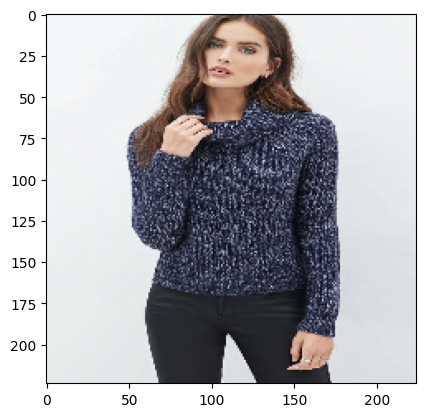

In [24]:
from helpers import show_image
show_image(test_data.iat[2,0])

In [25]:
from PIL import Image
import os

max_pixel_limit = 178956970
batch=0
i = 0

for k,row in test_data.iterrows():
    try:
        image = Image.open(row["paths"])
        total_pixels = image.size[0] * image.size[1]
        if total_pixels > max_pixel_limit:
            print(f"Removed {i} - Exceeds pixel limit")

        i = i + 1 
        if i >= 31:
            i = 0 
            batch = batch + 1 
    except Exception as e:
        print(f"batch:{batch} index:{k}")

batch:121 index:3778


In [26]:
test_data = test_data.drop([3778])

In [27]:
X_test2 = test_data.iloc[:, 0] 
y_test2 = test_data.iloc[:, 1:] 

merged_all_classes = [] 
for idx, row in y_test2.iterrows():
    merged_all_classes.append([col for col, val in row.items() if val == 1])

y_test2 = pd.Series(merged_all_classes, index=y_test2.index, name="labels") 

test2_data_flow_df = pd.concat([
    X_test2, 
    y_test2
], axis=1) 

In [28]:
test2_gen = ImageDataGenerator() 
test_2 = test2_gen.flow_from_dataframe(
    dataframe=test2_data_flow_df, 
    directory="", 
    x_col="paths", 
    y_col="labels", 
    class_mode='categorical', 
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    shuffle=False)

Found 3999 validated image filenames belonging to 26 classes.


# Model 2: Efficient Net 

In [29]:
import tensorflow as tf
efficient_net = tf.keras.applications.EfficientNetB5(include_top=False)
efficient_net.trainable = False

In [30]:
from tensorflow import keras 

inputs = keras.Input(shape=(IMG_WIDTH,IMG_HEIGHT,3)) 
x = efficient_net(inputs) 
x = keras.layers.GlobalAveragePooling2D()(x) 

initializer = tf.keras.initializers.GlorotUniform(seed=42) 
activation = tf.keras.activations.sigmoid  
kernel_regularizer = tf.keras.regularizers.l2(0.01)

outputs = keras.layers.Dense(nr_of_classes,
                             kernel_initializer=initializer,
                             kernel_regularizer = kernel_regularizer,  
                             activation=activation)(x) 

model_2 = keras.Model(inputs, outputs) 

In [14]:
METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall')
]

model_2.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(), # default from_logits=False
              metrics=METRICS)

In [20]:
checkpoint_path = "checkpoints/high_res_all_fine_grained/checkpoint-{epoch:01d}.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1)

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [40]:
history_model_2 = model_2.fit(
        train, 
        validation_data=test,
        epochs=20,
        callbacks=[checkpoint_callback])

Epoch 1/20
350/350 [==============================] - ETA: 0s - loss: 0.4429 - accuracy: 0.8688 - precision: 0.7786 - recall: 0.6028 
Epoch 1: saving model to checkpoints/high_res_all_fine_grained\checkpoint-1.ckpt
350/350 [==============================] - 10590s 30s/step - loss: 0.4429 - accuracy: 0.8688 - precision: 0.7786 - recall: 0.6028 - val_loss: 0.3929 - val_accuracy: 0.8746 - val_precision: 0.8065 - val_recall: 0.6007
Epoch 2/20
350/350 [==============================] - ETA: 0s - loss: 0.3905 - accuracy: 0.8735 - precision: 0.7947 - recall: 0.6090 
Epoch 2: saving model to checkpoints/high_res_all_fine_grained\checkpoint-2.ckpt
350/350 [==============================] - 10387s 30s/step - loss: 0.3905 - accuracy: 0.8735 - precision: 0.7947 - recall: 0.6090 - val_loss: 0.3847 - val_accuracy: 0.8749 - val_precision: 0.7930 - val_recall: 0.6196
Epoch 3/20
350/350 [==============================] - ETA: 0s - loss: 0.3829 - accuracy: 0.8727 - precision: 0.7937 - recall: 0.6059 
Ep

In [35]:
# model_2.save("../trained_models/model_2_efficientnet_SHUFFLEDdata_fine_grained_vgg.h5") 


In [88]:
# from helpers import save_with_pickle
# save_with_pickle("../trained_models/model_2_efficientnet_SHUFFLEDdata_fine_grained_vgg_HISTORY.pickle", history_model_2.history)

In [44]:
from matplotlib import pyplot as plt 

plt.plot(pd.DataFrame(history_model_2.history)[["loss", "val_loss"]])
plt.show()

: 

: 

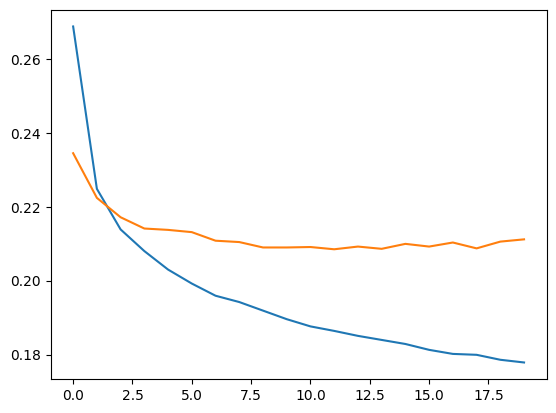

In [93]:
import numpy as np 
import matplotlib.pyplot as plt 

loss = np.array(history_model_2.history["loss"], dtype=np.float16) 
val_loss = np.array(history_model_2.history["val_loss"], dtype=np.float16) 

plt.plot(loss, label="loss") 
plt.plot(val_loss, label="val_loss")
plt.show()

### Model 2 Fine Tune

In [15]:
# kernel crashed 
model_2.load_weights("checkpoints/high_res_all_fine_grained/checkpoint-70.ckpt")

In [16]:
efficient_net.trainable = True  

for layer in efficient_net.layers[:-5]:
    layer.trainable = False 

model_2.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(), 
              metrics=METRICS)

In [17]:
from keras.callbacks import LearningRateScheduler 

checkpoint_path = "checkpoints/high_res_all_fine_grained/checkpoint-{epoch:01d}.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1)


def decay_schedule(epoch, lr):
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % 5 == 0) and (epoch != 0):
        lr = lr * 0.1
    return lr

lr_scheduler = LearningRateScheduler(decay_schedule)

In [18]:
history_model_2_fine_v3 = model_2.fit(
        train, 
        validation_data =test,
        epochs=100, 
        initial_epoch=71, # start from previous last epoch 
        callbacks=[checkpoint_callback, lr_scheduler])

Epoch 72/100
350/350 [==============================] - ETA: 0s - loss: 0.2607 - accuracy: 0.9072 - precision: 0.8387 - recall: 0.7401 
Epoch 72: saving model to checkpoints/high_res_all_fine_grained\checkpoint-72.ckpt
350/350 [==============================] - 8769s 25s/step - loss: 0.2607 - accuracy: 0.9072 - precision: 0.8387 - recall: 0.7401 - val_loss: 0.2517 - val_accuracy: 0.9110 - val_precision: 0.8378 - val_recall: 0.7617 - lr: 0.0010
Epoch 73/100
350/350 [==============================] - ETA: 0s - loss: 0.2500 - accuracy: 0.9117 - precision: 0.8465 - recall: 0.7544 
Epoch 73: saving model to checkpoints/high_res_all_fine_grained\checkpoint-73.ckpt
350/350 [==============================] - 8617s 25s/step - loss: 0.2500 - accuracy: 0.9117 - precision: 0.8465 - recall: 0.7544 - val_loss: 0.2429 - val_accuracy: 0.9130 - val_precision: 0.8400 - val_recall: 0.7695 - lr: 0.0010
Epoch 74/100
350/350 [==============================] - ETA: 0s - loss: 0.2454 - accuracy: 0.9134 - prec

In [31]:
history_model_2_fine_2 = model_2.fit(
        train, 
        validation_data =test,
        epochs=70, 
        initial_epoch=39, # start from previous last epoch 
        callbacks=[checkpoint_callback, lr_scheduler])

Epoch 40/70
350/350 [==============================] - ETA: 0s - loss: 0.2571 - accuracy: 0.9085 - precision: 0.8455 - recall: 0.7383
Epoch 40: saving model to checkpoints/high_res_all_fine_grained\checkpoint-40.ckpt
350/350 [==============================] - 3163s 9s/step - loss: 0.2571 - accuracy: 0.9085 - precision: 0.8455 - recall: 0.7383 - val_loss: 0.2537 - val_accuracy: 0.9090 - val_precision: 0.8424 - val_recall: 0.7448 - lr: 1.0000e-07
Epoch 41/70
350/350 [==============================] - ETA: 0s - loss: 0.2567 - accuracy: 0.9087 - precision: 0.8461 - recall: 0.7390
Epoch 41: saving model to checkpoints/high_res_all_fine_grained\checkpoint-41.ckpt
350/350 [==============================] - 3133s 9s/step - loss: 0.2567 - accuracy: 0.9087 - precision: 0.8461 - recall: 0.7390 - val_loss: 0.2535 - val_accuracy: 0.9090 - val_precision: 0.8423 - val_recall: 0.7452 - lr: 1.0000e-08
Epoch 42/70
350/350 [==============================] - ETA: 0s - loss: 0.2565 - accuracy: 0.9094 - pre

In [20]:
history_model_2_fine_2_v = model_2.fit(
        train, 
        validation_data =test,
        epochs=100, 
        initial_epoch=70, # start from previous last epoch 
        callbacks=[checkpoint_callback, lr_scheduler])

Epoch 71/100
350/350 [==============================] - ETA: 0s - loss: 0.2207 - accuracy: 0.9221 - precision: 0.8669 - recall: 0.7827
Epoch 71: saving model to checkpoints/high_res_all_fine_grained\checkpoint-71.ckpt
350/350 [==============================] - 4034s 12s/step - loss: 0.2207 - accuracy: 0.9221 - precision: 0.8669 - recall: 0.7827 - val_loss: 0.2239 - val_accuracy: 0.9194 - val_precision: 0.8559 - val_recall: 0.7822 - lr: 1.0000e-09
Epoch 72/100
350/350 [==============================] - ETA: 0s - loss: 0.2209 - accuracy: 0.9219 - precision: 0.8664 - recall: 0.7821
Epoch 72: saving model to checkpoints/high_res_all_fine_grained\checkpoint-72.ckpt
350/350 [==============================] - 3904s 11s/step - loss: 0.2209 - accuracy: 0.9219 - precision: 0.8664 - recall: 0.7821 - val_loss: 0.2240 - val_accuracy: 0.9194 - val_precision: 0.8560 - val_recall: 0.7821 - lr: 1.0000e-09
Epoch 73/100
350/350 [==============================] - ETA: 0s - loss: 0.2209 - accuracy: 0.9218 

In [ ]:
# model_2.save("../trained_models/fine_model_2_fine_grained_vgg.h5") 

<AxesSubplot:>

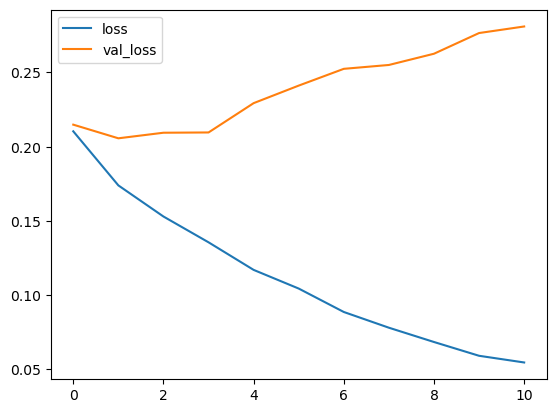

In [48]:
pd.DataFrame(history_model_2_fine.history)[["loss", "val_loss"]].plot()

In [49]:
def compare_historys(original_history, new_history, initial_epochs=10):
    """
    Compares two TensorFlow model History objects.
    
    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here) 
    """ 
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

<AxesSubplot:>

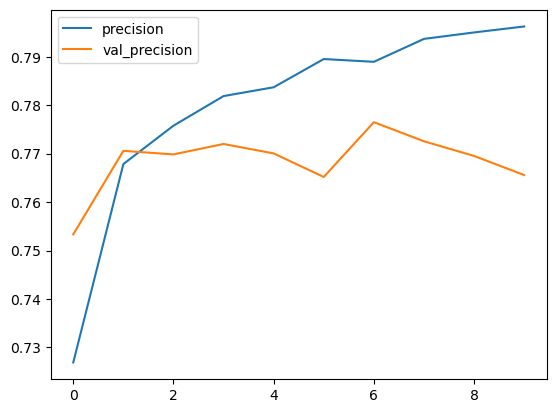

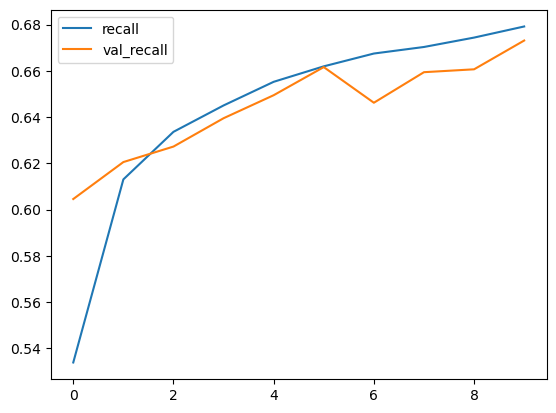

In [55]:
pd.DataFrame(history_model_2.history)[["precision", "val_precision"]].plot()
pd.DataFrame(history_model_2.history)[["recall", "val_recall"]].plot()

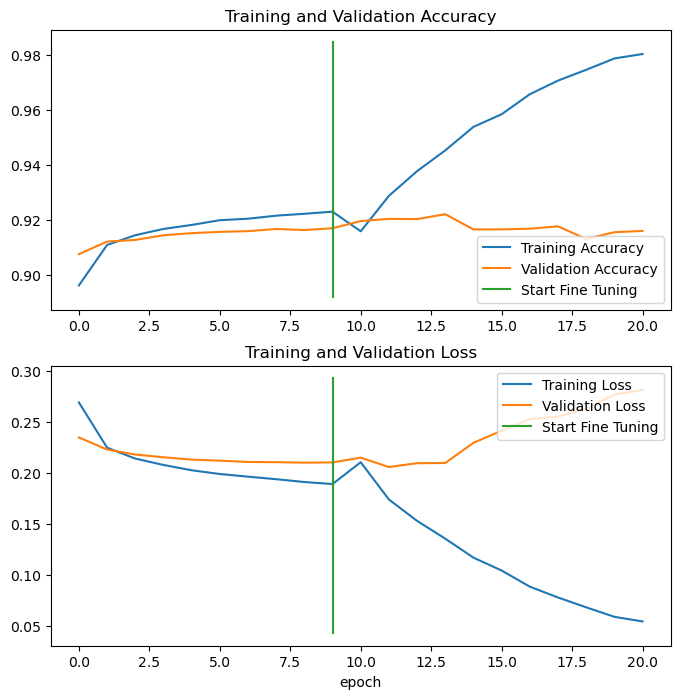

In [50]:
compare_historys(history_model_2, history_model_2_fine)

In [21]:
model_2.save("../trained_models/high_res_all_attr_efnet_b5.h5")

# Model 5: Grid Search on Efficient Net

In [16]:
from sklearn.model_selection import ParameterGrid 

parameters = {
    'batch_size': [32, 48, 64],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'freeze': [False, True]
}

list(ParameterGrid(parameters))

[{'batch_size': 32, 'freeze': False, 'learning_rate': 0.001},
 {'batch_size': 32, 'freeze': False, 'learning_rate': 0.01},
 {'batch_size': 32, 'freeze': False, 'learning_rate': 0.1},
 {'batch_size': 32, 'freeze': False, 'learning_rate': 0.2},
 {'batch_size': 32, 'freeze': False, 'learning_rate': 0.3},
 {'batch_size': 32, 'freeze': True, 'learning_rate': 0.001},
 {'batch_size': 32, 'freeze': True, 'learning_rate': 0.01},
 {'batch_size': 32, 'freeze': True, 'learning_rate': 0.1},
 {'batch_size': 32, 'freeze': True, 'learning_rate': 0.2},
 {'batch_size': 32, 'freeze': True, 'learning_rate': 0.3},
 {'batch_size': 48, 'freeze': False, 'learning_rate': 0.001},
 {'batch_size': 48, 'freeze': False, 'learning_rate': 0.01},
 {'batch_size': 48, 'freeze': False, 'learning_rate': 0.1},
 {'batch_size': 48, 'freeze': False, 'learning_rate': 0.2},
 {'batch_size': 48, 'freeze': False, 'learning_rate': 0.3},
 {'batch_size': 48, 'freeze': True, 'learning_rate': 0.001},
 {'batch_size': 48, 'freeze': True,

In [25]:
list(ParameterGrid(parameters))[17]

{'batch_size': 48, 'freeze': True, 'learning_rate': 0.1}

In [17]:
def get_generator(batch_size:int, random_state: int): 
    train_gen_grid = ImageDataGenerator() 
    test_gen_grid = ImageDataGenerator()

    train_grid = train_gen_grid.flow_from_dataframe(
        dataframe=train_data_flow_df, 
        directory="", 
        x_col="paths", 
        y_col="labels", 
        seed=random_state, 
        class_mode='categorical', 
        batch_size=batch_size,
        target_size=(224, 224))

    test_grid = test_gen_grid.flow_from_dataframe(
        dataframe=test_data_flow_df, 
        directory="", 
        x_col="paths", 
        y_col="labels", 
        seed=random_state, 
        class_mode='categorical',
        batch_size=batch_size, 
        target_size=(224, 224))
    
    return train_grid, test_grid

In [18]:
def create_model(learning_rate, freeze: bool): 
    efficient_net = tf.keras.applications.EfficientNetB0(include_top=False)
    efficient_net.trainable = False

    if freeze: 
        efficient_net.trainable = True 
        for layer in efficient_net.layers[:-15]:
            layer.trainable = False 

    inputs = keras.Input(shape=(224,224,3)) 
    x = efficient_net(inputs) 
    x = keras.layers.GlobalAveragePooling2D()(x) 
    initializer = tf.keras.initializers.GlorotUniform(seed=42) 
    activation = tf.keras.activations.sigmoid  
    outputs = keras.layers.Dense(nr_of_classes,
                                kernel_initializer=initializer, 
                                activation=activation)(x) 

    model = keras.Model(inputs, outputs) 
    METRICS = [
        keras.metrics.BinaryAccuracy(name='accuracy'),
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                loss=keras.losses.BinaryCrossentropy(), # default from_logits=False
                metrics=METRICS)   
    
    return model

In [24]:
def try_fit(parameters_list: list): 
    historys = [] 
    i = 0
    for idx,parameter_set in enumerate(parameters_list):
        gen_train, gen_test = get_generator(parameter_set["batch_size"], random_state=64)
        model = create_model(learning_rate=parameter_set["learning_rate"], freeze=parameter_set["freeze"]) 
        history = model.fit(gen_train, validation_data=gen_test, epochs=30) 
        historys.append({
            "model_id": idx, 
            "model_parameters": parameters_list, 
            "history": history,
            "model_weights": model.get_weights() 
        })
    
    return historys 

In [22]:
history = try_fit(list(ParameterGrid(parameters)))

Found 11200 validated image filenames belonging to 14 classes.
Found 4800 validated image filenames belonging to 14 classes.
Epoch 1/30
350/350 [==============================] - 310s 852ms/step - loss: 0.2685 - accuracy: 0.8972 - precision: 0.7312 - recall: 0.5353 - val_loss: 0.2353 - val_accuracy: 0.9080 - val_precision: 0.7638 - val_recall: 0.5915
Epoch 2/30
350/350 [==============================] - 280s 801ms/step - loss: 0.2250 - accuracy: 0.9107 - precision: 0.7673 - recall: 0.6112 - val_loss: 0.2236 - val_accuracy: 0.9122 - val_precision: 0.7712 - val_recall: 0.6195
Epoch 3/30
350/350 [==============================] - 251s 718ms/step - loss: 0.2134 - accuracy: 0.9152 - precision: 0.7790 - recall: 0.6346 - val_loss: 0.2178 - val_accuracy: 0.9140 - val_precision: 0.7764 - val_recall: 0.6280
Epoch 4/30
350/350 [==============================] - 261s 746ms/step - loss: 0.2077 - accuracy: 0.9167 - precision: 0.7804 - recall: 0.6457 - val_loss: 0.2151 - val_accuracy: 0.9146 - val_pr

# Evaluate Models 

### Evaluation of Model 2

In [31]:
model_2_fine_tuned = tf.keras.models.load_model("../trained_models/high_res_all_attr_efnet_b5.h5")

In [41]:
model_2_fine_tuned.evaluate(test_2)

125/125 [==============================] - 2338s 19s/step - loss: 0.2214 - accuracy: 0.9209 - precision: 0.8584 - recall: 0.7872


[0.2214198261499405, 0.9209129214286804, 0.858350396156311, 0.7871968150138855]

In [65]:
import numpy as np 

d = test_2.class_indices.copy()
d = [k for k in d.keys()]
output_labels = test_data.loc[:, d].columns.tolist() 
output_labels[:5]

['chiffon', 'conventional', 'cotton', 'crew_neckline', 'denim']

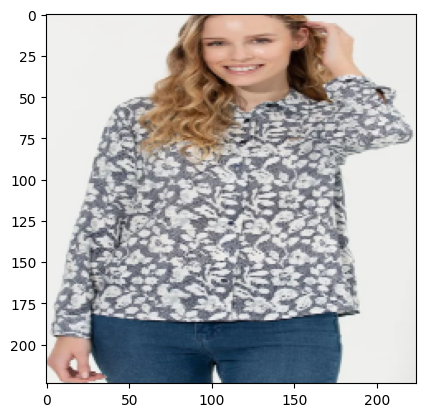

1/1 [==============================] - 0s 365ms/step


,0
chiffon,0.0
conventional,1.0
cotton,1.0
crew_neckline,1.0
denim,0.0
embroidered,0.0
faux,0.0
floral,1.0
graphic,0.0
knit,0.0


In [68]:
from helpers import show_image, evaluate_img


path = "../datasets/demos/floral.PNG"
show_image(path)
pd.DataFrame(evaluate_img(path, model=model_2_fine_tuned, columns=output_labels, dims = (456,456,3) ,threshold=0.45))

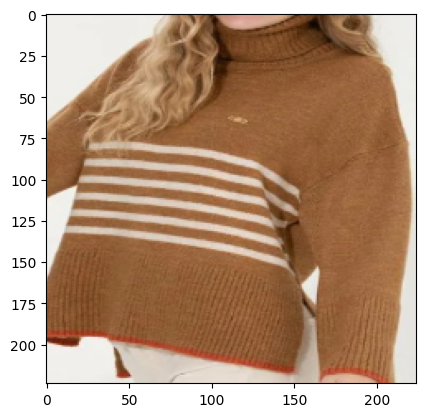

1/1 [==============================] - 0s 422ms/step


,0
chiffon,0.0
conventional,1.0
cotton,0.0
crew_neckline,1.0
denim,0.0
embroidered,0.0
faux,0.0
floral,0.0
graphic,0.0
knit,1.0


In [69]:
path = "../datasets/demos/melanj_uspa.PNG"
show_image(path)
pd.DataFrame(evaluate_img(path, model=model_2_fine_tuned, columns=output_labels, dims = (456,456,3) ,threshold=0.45))

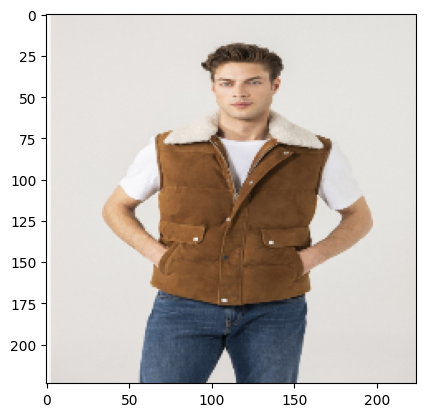

1/1 [==============================] - 1s 662ms/step


,0
chiffon,0.0
conventional,1.0
cotton,1.0
crew_neckline,0.0
denim,1.0
embroidered,0.0
faux,0.0
floral,0.0
graphic,0.0
knit,0.0


In [71]:
path = "../datasets/demos/kurklu_yelek.PNG"
show_image(path)
pd.DataFrame(evaluate_img(path, model=model_2_fine_tuned, columns=output_labels, dims = (456,456,3) ,threshold=0.30))

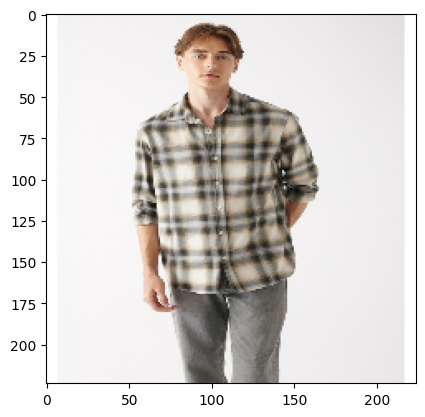

1/1 [==============================] - 1s 619ms/step


,0
chiffon,0.0
conventional,1.0
cotton,1.0
crew_neckline,0.0
denim,0.0
embroidered,0.0
faux,0.0
floral,0.0
graphic,0.0
knit,0.0


In [74]:
path = "../datasets/demos/kareli_gomlek.jpg"
show_image(path)
pd.DataFrame(evaluate_img(path, model=model_2_fine_tuned, columns=output_labels, dims = (456,456,3) ,threshold=0.45))

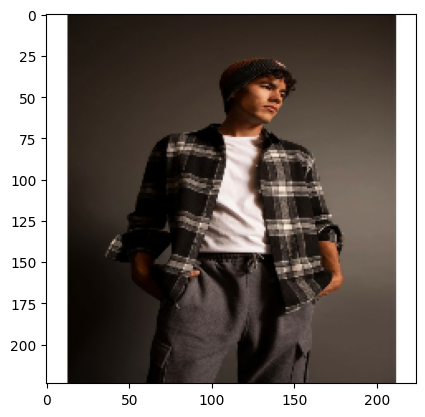

1/1 [==============================] - 1s 557ms/step


,0
chiffon,0.0
conventional,1.0
cotton,1.0
crew_neckline,1.0
denim,0.0
embroidered,0.0
faux,0.0
floral,0.0
graphic,0.0
knit,0.0


In [75]:
path = "../datasets/demos/kareli_gomlek2.jpg"
show_image(path)
pd.DataFrame(evaluate_img(path, model=model_2_fine_tuned, columns=output_labels, dims = (456,456,3) ,threshold=0.30))

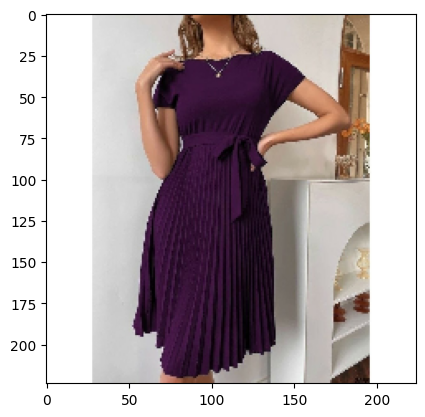

1/1 [==============================] - 2s 2s/step


,0
chiffon,1.0
conventional,1.0
cotton,1.0
crew_neckline,1.0
denim,0.0
embroidered,0.0
faux,0.0
floral,0.0
graphic,0.0
knit,0.0


In [78]:
path = "../datasets/demos/Pileli_elbise.jpg"
show_image(path)
pd.DataFrame(evaluate_img(path, model=model_2_fine_tuned, columns=output_labels, dims = (456,456,3) ,threshold=0.30))

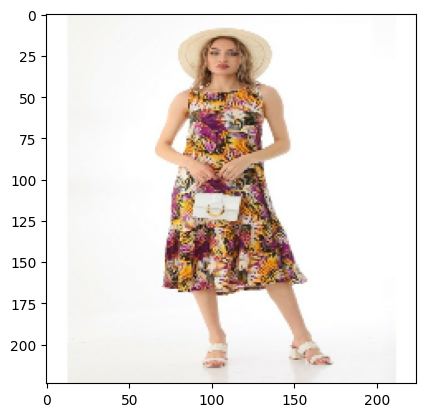

1/1 [==============================] - 0s 457ms/step


,0
chiffon,0.0
conventional,1.0
cotton,1.0
crew_neckline,1.0
denim,0.0
embroidered,0.0
faux,0.0
floral,1.0
graphic,0.0
knit,0.0


In [81]:
path = "../datasets/demos/cicekli elbise.jpg"
show_image(path)
pd.DataFrame(evaluate_img(path, model=model_2_fine_tuned, columns=output_labels, dims = (456,456,3) ,threshold=0.45))

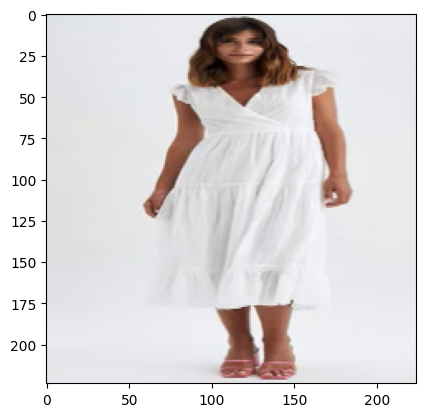

1/1 [==============================] - 0s 395ms/step


,0
chiffon,1.0
conventional,1.0
cotton,1.0
crew_neckline,0.0
denim,0.0
embroidered,0.0
faux,0.0
floral,0.0
graphic,0.0
knit,0.0


In [83]:
path = "../datasets/demos/oscope.PNG"
show_image(path)
pd.DataFrame(evaluate_img(path, model=model_2_fine_tuned, columns=output_labels, dims = (456,456,3) ,threshold=0.45))

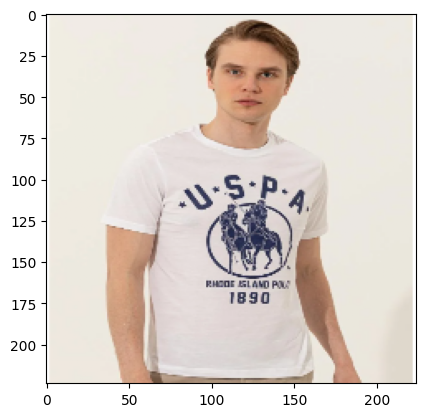

1/1 [==============================] - 0s 479ms/step


,0
chiffon,0.0
conventional,1.0
cotton,1.0
crew_neckline,1.0
denim,0.0
embroidered,0.0
faux,0.0
floral,0.0
graphic,1.0
knit,0.0


In [87]:
path = "../datasets/demos/baskili.PNG"
show_image(path)
pd.DataFrame(evaluate_img(path, model=model_2_fine_tuned, columns=output_labels, dims = (456,456,3) ,threshold=0.45))